In [9]:
from plotly.offline import plot, iplot, init_notebook_mode
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
init_notebook_mode(connected=True)

In [11]:
spotify = pd.read_excel('Spotify 2010 - 2019 Top 100 Songs.xlsx')
spotify.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [12]:
spotify.tail()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
995,SICKO MODE,Travis Scott,hip hop,2018,2020‑06‑22,155,73,83,-4,12,45,313,1,22,86,2019,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019,2020‑06‑22,80,50,55,-9,80,41,190,23,7,85,2019,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019,2020‑06‑22,103,77,89,-5,9,46,177,1,7,68,2019,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019,2020‑08‑20,138,58,53,-6,10,59,214,1,10,67,2019,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019,2020‑06‑22,98,59,80,-7,13,18,200,2,15,75,2019,Solo


In [13]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


In [14]:
spotify.dropna(inplace=True)
spotify[spotify.duplicated()]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type


In [15]:
#Looking at how much values have each column
spotify.nunique()

title            945
artist           444
top genre        132
year released     14
added             26
bpm              122
nrgy              80
dnce              68
dB                16
live              67
val               93
dur              176
acous             89
spch              50
pop               55
top year          10
artist type        4
dtype: int64

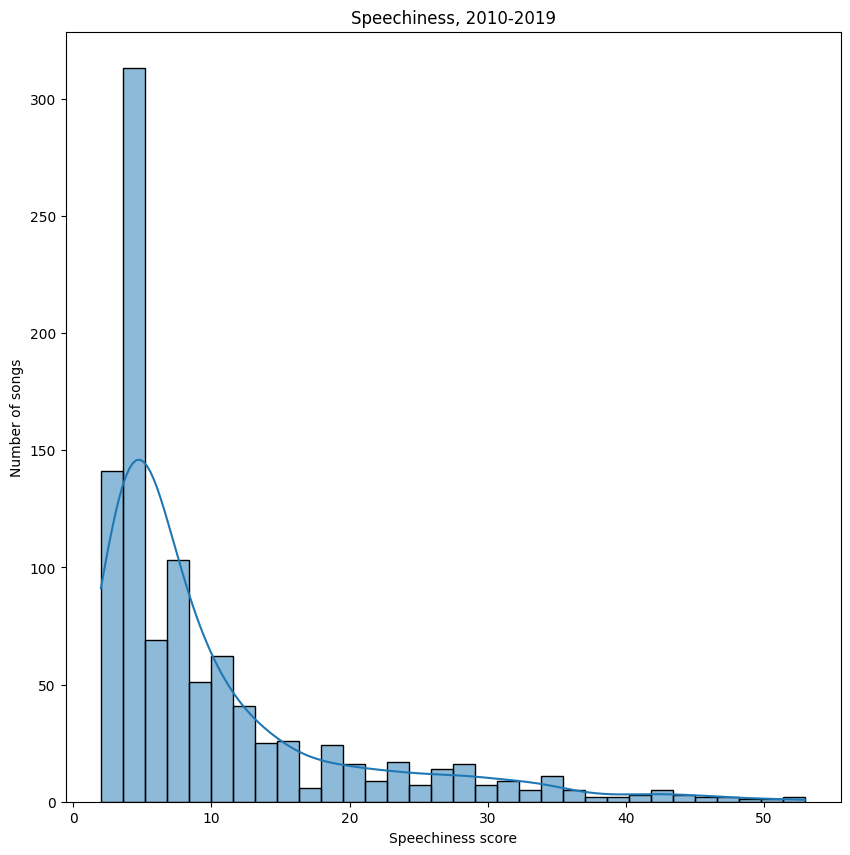

In [42]:
#spch 2010-2019
'positive skewness'

plt.figure(figsize=(10,10))
sas = sns.histplot(spotify['spch'], kde=True)
sas.set_title('Speechiness, 2010-2019')
sas.set_ylabel('Number of songs')
sas.set_xlabel('Speechiness score');

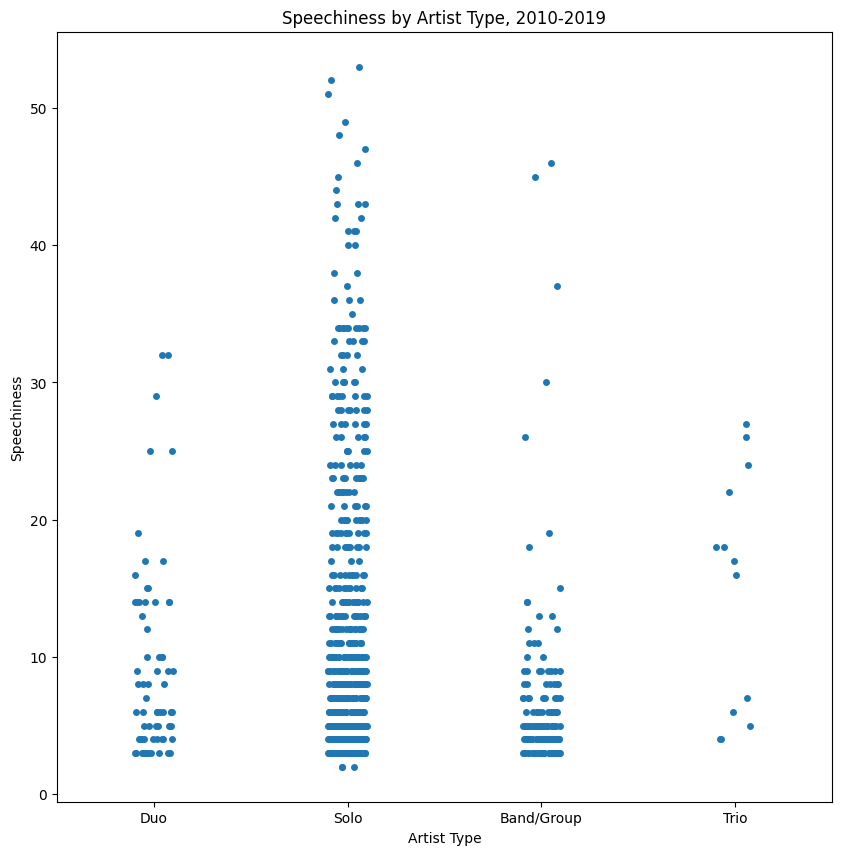

In [43]:
#spch: artist type
'Solo artists have instances of the highest speechiness'
'[note the increasing popularity of hip hop and rap]'

plt.figure(figsize=(10,10))
s_ty = sns.stripplot(x=spotify['artist type'], y=spotify['spch'], data=spotify)
s_ty.set_title('Speechiness by Artist Type, 2010-2019')
s_ty.set_ylabel('Speechiness')
s_ty.set_xlabel('Artist Type');

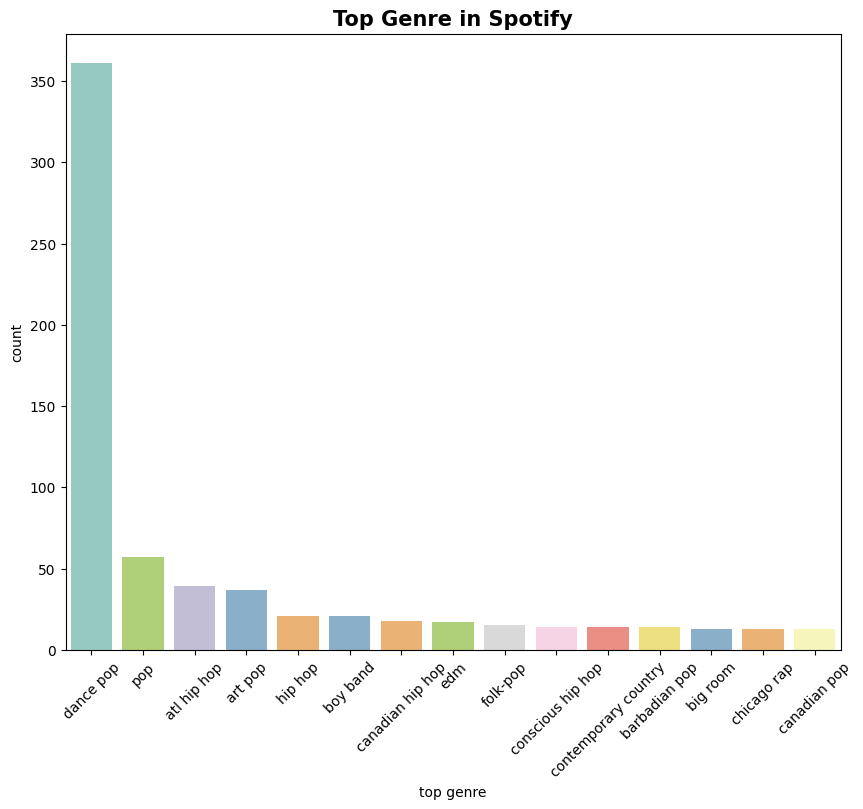

In [17]:
#As we are looking at the Top Genre( we just look at the 15th top genre's values)
plt.figure(figsize=(10,8))
plt.title('Top Genre in Spotify',fontsize=15, fontweight='bold')
ax = sns.countplot(x="top genre",  hue="top genre", data=spotify, palette="Set3", order=spotify['top genre'].value_counts().index[0:15], legend=False)
plt.xticks(rotation=45);

In [38]:
def extract(genre):
    pop_name = 'pop' if ('pop' in genre)and not('dance pop' in genre) else genre
    hip_hop_name = 'hip hop' if 'hip hop' in pop_name else pop_name
    rock_name = 'rock' if 'rock' in hip_hop_name else hip_hop_name
    rap_name = 'rap' if 'rap' in rock_name else rock_name

    return rap_name


spotify['grouped_genre'] = spotify['top genre'].apply(extract)
spotify['grouped_genre'].value_counts()


grouped_genre
dance pop           361
pop                 199
hip hop             126
rap                  62
rock                 39
                   ... 
tropical house        1
contemporary r&b      1
deep disco house      1
bubblegum dance       1
uk drill              1
Name: count, Length: 65, dtype: int64

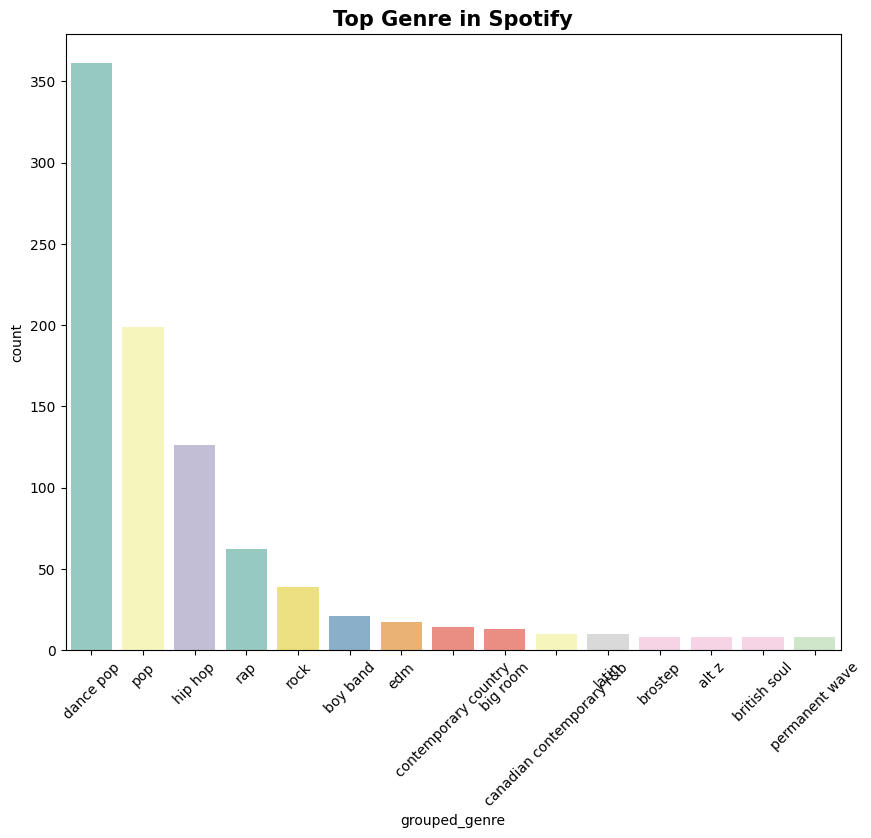

In [39]:
plt.figure(figsize=(10,8))
plt.title('Top Genre in Spotify',fontsize=15, fontweight='bold')
ax = sns.countplot(x="grouped_genre",  hue="grouped_genre", data=spotify, palette="Set3", order=spotify['grouped_genre'].value_counts().index[0:15], legend=False)
plt.xticks(rotation=45);

In [36]:
# Filter the DataFrame to keep only rows where 'grouped_genre' is one of the specified genres
spotify_filtered = spotify[spotify['grouped_genre'].isin([ 'pop', 'hip hop', 'rock', 'rap'])]

# Drop the 'common_word' column as it's not needed anymore
#spotify_filtered.drop(columns=['common_word'], inplace=True)

# Optionally, reset the index if you want consecutive integer index
spotify_filtered.reset_index(drop=True, inplace=True)
len(spotify_filtered)

426

In [44]:
def get_day_of_week(date_str: str):
    try:
        date_str = date_str.replace('‑', '-')
        # Convert the input string to a datetime object
        date_obj = pd.to_datetime(date_str, format="%Y-%m-%d")
        # Get the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
        day_of_week = date_obj.dayofweek
        # List of days of the week
        days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
        # Return the day of the week
        return days[day_of_week]
    except ValueError as e:
        print(e)


def process_song_name(song_name):
    global global_word_to_number, word_number_counter
    words = song_name.split()
    unnecessary_words = ["the", "a", "an", "of", "in", "to", "for", "and", "with", "on"]
    words = [word for word in words if word.lower() not in unnecessary_words]
    word_to_number = {}
    for word in words:
        if word not in global_word_to_number:
            global_word_to_number[word] = word_number_counter
            word_number_counter += 1
        word_to_number[word] = global_word_to_number[word]

    return word_to_number


def pre_process_binary(data):
    # transform the added column to be datetime objects.
    data["added"] = data["added"].apply(get_day_of_week)

    # create dummy columns
    str_columns = ["title", "artist", "top genre", "added", "artist type", "grouped_genre"]
    dummies = ['added', 'artist type', 'year released']
    new_data = pd.get_dummies(data.drop(list(filter(lambda x: x not in dummies, str_columns)), axis=1))
    new_data["grouped_genre"] = data["grouped_genre"]
    return new_data

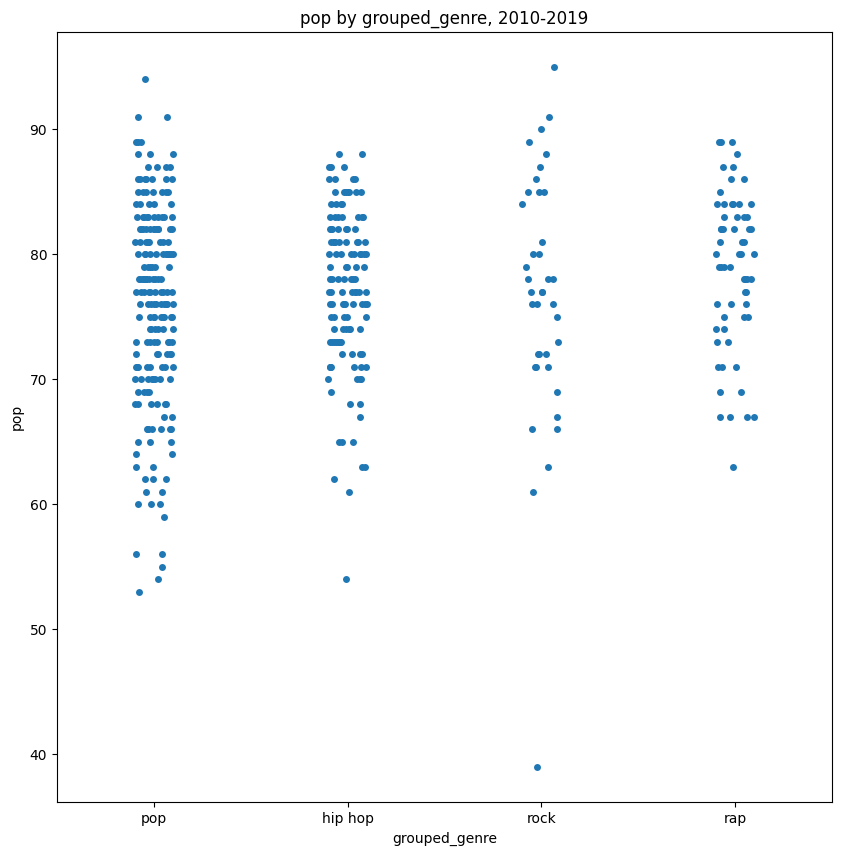

In [49]:
#spch: artist type
'Solo artists have instances of the highest speechiness'
'[note the increasing popularity of hip hop and rap]'

plt.figure(figsize=(10,10))
s_ty = sns.stripplot(x=spotify_filtered['grouped_genre'], y=spotify_filtered['pop'], data=spotify_filtered)
s_ty.set_title('pop by grouped_genre, 2010-2019')
s_ty.set_ylabel('pop')
s_ty.set_xlabel('grouped_genre');

In [50]:
categories_artist= spotify['artist'].value_counts().head(5).index.tolist() 
values_artist= spotify['artist'].value_counts().head(5).values.tolist()    

In [51]:
best_five= pd.DataFrame({'name artist':categories_artist,'type of genre':['dance pop', 'pop', 'hip hop', 'rock', 'rap'],'number of hits':values_artist})
best_five

,name artist,type of genre,number of hits
0,Taylor Swift,dance pop,21
1,Drake,pop,18
2,Calvin Harris,hip hop,18
3,Rihanna,rock,14
4,Ariana Grande,rap,14


In [52]:
filtered = spotify_filtered[spotify['artist'].isin(categories_artist)]
a=filtered[['artist','grouped_genre','artist type']]
a.groupby(['artist','grouped_genre']).count()

C:\Users\User\AppData\Local\Temp\ipykernel_11012\2630489509.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,,artist type
artist,grouped_genre,
6ix9ine,rap,2
Avril Lavigne,pop,1
Eminem,hip hop,1
Flipp Dinero,rap,1
G-Eazy,pop,1
Gotye,pop,1
Imagine Dragons,rock,2
Justin Bieber,pop,1
KYLE,pop,1
